In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets, transforms

import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image, display, HTML

from sklearn.metrics import confusion_matrix
import seaborn as sns

<div style="background-color: lightblue; padding: 10px;">
    <p> A Convolutional Neural Network (CNN) is a type of deep learning model specifically designed for processing structured grid data like images. It consists of multiple layers, including convolutional layers, pooling layers, and fully connected layers. The convolutional layers apply filters to the input data to detect features such as edges, textures, and shapes. Pooling layers reduce the dimensionality of the data, making the model more efficient and less prone to overfitting. Finally, fully connected layers interpret the extracted features to make predictions.</p>
    <p style="margin: 0;">CNNs are widely used because they excel at recognizing patterns and structures in images, making them ideal for tasks like image classification, object detection, and facial recognition. They require less preprocessing compared to traditional methods, as they can automatically learn relevant features from raw data. Additionally, CNNs are highly scalable and can be adapted to various applications, from medical image analysis to autonomous driving. Their ability to handle large amounts of data and deliver high accuracy makes them a powerful tool in the field of computer vision.</p>
</div>

<div style="background-color: lightgray; padding: 10px;">
    <p style="font-size: 16px">Version 1. The simpler MNIST digits dataset</p>
</div>

In [25]:
# Assuming X_train_tensor and y_train_tensor are your training tensors
# and X_test_tensor and y_test_tensor are your test tensors
print("X_train_tensor shape:", X_train_tensor.shape)
print("y_train_tensor shape:", y_train_tensor.shape)
print("X_test_tensor shape:", X_test_tensor.shape)
print("y_test_tensor shape:", y_test_tensor.shape)

X_train_tensor shape: torch.Size([60000, 1, 28, 28])
y_train_tensor shape: torch.Size([60000])
X_test_tensor shape: torch.Size([10000, 1, 28, 28])
y_test_tensor shape: torch.Size([10000])


In [23]:
# Download MNIST files from github: https://github.com/golbin/TensorFlow-MNIST/tree/master/mnist/data
# Read in 4 files in binary read mode and temporary save as lbpath and imgpath.
# lbpath.read(): This reads the entire content of the file into memory.
# np.frombuffer(...): This function from the NumPy library converts the file content into a NumPy array.
# dtype=np.uint8: This specifies that the data type of the array elements is unsigned 8-bit integers.
# offset=8: This skips the first 8 bytes of the file content, which are usually header information
# lbpath: This variable is used to read the training labels file. Once the 'with' block is exited, lbpath is no longer in scope and can be used for testing labels

# Read training images
with open(r"C:\\Users\thesk\eclipse-workspace\PyTorch-FashionMMNIST\train-images.idx3-ubyte", 'rb') as imgpath:
    X_train = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(y_train), 28, 28)
    
# Read test images
with open(r"C:\Users\thesk\eclipse-workspace\PyTorch-FashionMMNIST\t10k-images.idx3-ubyte", 'rb') as imgpath:
    X_test = np.frombuffer(imgpath.read(), dtype=np.uint8, offset=16).reshape(len(y_test), 28, 28)
    
# Read training labels
with open(r"C:\Users\thesk\eclipse-workspace\PyTorch-FashionMMNIST\train-labels.idx1-ubyte", 'rb') as lbpath:
    y_train = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

# Read test labels
with open(r"C:\\Users\thesk\eclipse-workspace\PyTorch-FashionMMNIST\t10k-labels.idx1-ubyte", 'rb') as lbpath:
    y_test = np.frombuffer(lbpath.read(), dtype=np.uint8, offset=8)

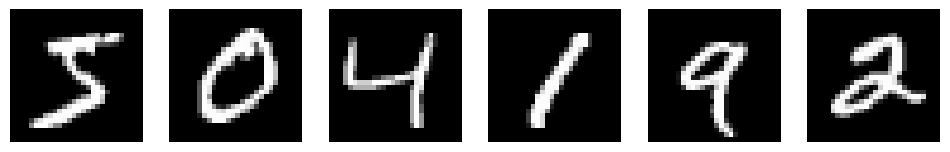

In [27]:
# Visualize some images
fig, axes = plt.subplots(1, 6, figsize=(12, 2))  # Create a figure with 1 row and 6 columns of subplots
for i in range(6):                               # Loop through the first 6 images
    ax = axes[i]                                 # Get the current axis
    ax.imshow(X_train[i], cmap='gray')           # Display the image in grayscale
    ax.axis('off')                               # Turn off the axis
plt.show()

This simple neural network takes an image, flattens it, and passes it through three layers to produce an output for classification.  
Initialization: Sets up 3 fully connected layers.  
Forward Pass: Processes the input through these layers with ReLU activations in between.  
   
Dimensionality Reduction: Input Size (28*28): Each image in the Fashion MNIST dataset is 28x28 pixels, which equals 784 pixels when flattened into a single vector.   
1st layer outputs 128 features. It is somewhat arbitrary but is a common practice to reduce the dimensionality while retaining enough features for the network to learn useful patterns. It balances complexity and computational efficiency.  
The network progressively reduces the number of features from 784 to 128, then to 64, and finally to 10. This helps in learning more abstract and high-level features at each layer.

X_train_tensor shape: torch.Size([60000, 1, 28, 28])
y_train_tensor shape: torch.Size([60000])
X_test_tensor shape: torch.Size([10000, 1, 28, 28])
y_test_tensor shape: torch.Size([10000])
Epoch 1/5, Loss: 0.15525351464748383
Epoch 2/5, Loss: 0.014136575162410736
Epoch 3/5, Loss: 0.05838490650057793
Epoch 4/5, Loss: 0.32316166162490845
Epoch 5/5, Loss: 0.12238069623708725
Accuracy: 96.66%


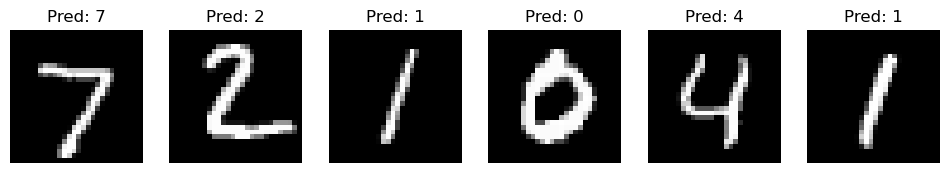

In [26]:
# Convert numpy arrays to PyTorch tensors
# PyTorch Tensors: These are multi-dimensional arrays provided by the PyTorch library, similar to NumPy arrays but optimized for deep learning tasks. 
# unsqueeze(1): Adds an extra dimension to the tensor as PyTorch expects image data to have a shape of [batch_size, channels, height, width]. For grayscale images channels is 1.
# If X_train originally has a shape of [60000, 28, 28] (60000 images, each 28x28 pixels), after unsqueeze(1), it will have a shape of [60000, 1, 28, 28].

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
# TensorDataset: This utility from PyTorch wraps PyTorch tensors into a dataset, so they can be accessed like a regular dataset object.
# PyTorch tensors containing the training and testing data and labels:
# X_train_tensor and X_test_tensor contain the features (e.g., images, numerical data, etc.).
# y_train_tensor and y_test_tensor contain the labels (e.g., the class or target values for each sample).

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a simple neural network by
# defining a new class SimpleNN that inherits from nn.Module, which is the base class for all neural network modules in PyTorch.

class SimpleNN(nn.Module):
    def __init__(self):                   # The constructor method that initializes the neural network.
        super(SimpleNN, self).__init__()  # This calls the constructor of the parent class (nn.Module)
        self.fc1 = nn.Linear(28*28, 128)  # Define the 1st fully connected layer that takes an input of size 28*28 (784) and outputs 128 features.
        self.fc2 = nn.Linear(128, 64)     # Define the 2nd fully connected layer that takes 128 features and outputs 64 features
        self.fc3 = nn.Linear(64, 10)      # Define the 3rd fully connected layer that takes 64 features and outputs 10 features (one for each class).

    def forward(self, x):                 # forward method: This defines the forward pass of the neural network.
        x = x.view(-1, 28*28)             # This reshapes the input tensor x to have a shape of [batch_size, 28*28]. The -1 means the batch size is inferred automatically.
        x = torch.relu(self.fc1(x))       # This applies the 1st fully connected layer followed by the ReLU activation function.
        x = torch.relu(self.fc2(x))       # This applies the 2nd fully connected layer followed by the ReLU activation function.
        x = self.fc3(x)                   # This applies the 3rd fully connected layer.
        return x                          # This returns the output of the network.
    
# Initialize the model, loss function, and optimizer
model = SimpleNN()                  # Create an instance of the SimpleNN class, which is our neural network model.
criterion = nn.CrossEntropyLoss()   # criterion: This sets up the loss function, which measures how well the model’s predictions match the actual labels. nn.CrossEntropyLoss is commonly used for classification tasks.
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Set up the optimizer, which updates the model’s parameters to minimize the loss. Adam is a popular optimization algorithm. lr=0.001: This sets the learning rate, which controls how much the optimizer adjusts the parameters during each step.

# Train the model

# Train the model
epochs = 5  # Set the number of epochs to 5
for epoch in range(epochs):              # Loop over each epoch
    for images, labels in train_loader:  # Loop over each batch of data
        optimizer.zero_grad()            # Zero the gradients or clear old gradients from the previous step
        output = model(images)           # Forward pass: get predictions from the model
        loss = criterion(output, labels) # Calculate the loss / measure prediction error = the difference between the model’s predictions and the actual labels using the loss function.
        loss.backward()                  # Compute the gradients of the loss with respect to the model’s parameters. Gradients tell us how much each parameter (weight) in the model needs to change to reduce the loss. It uses backpropagation, a key algorithm in training neural networks, to calculate these gradients.
        optimizer.step()                 # Update the model's parameters
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")  # Print the loss for the current epoch to monitor training progress

        
# Evaluate the model
correct = 0  # Initialize the count of correct predictions
total = 0  # Initialize the total number of samples
# Correct and total are set to 0. These will keep track of the number of correct predictions and the total number of samples, respectively

with torch.no_grad():  # Disable gradient calculation for inference to reduce memory usage and speed up computations during inference
    for images, labels in test_loader:       # Iterate over batches of images&labels in test data
        output = model(images)               # Pass the images through the model to get the model output predictions.
        _, predicted = torch.max(output, 1)  # Get the index of the max log-probability.  Finds the predicted labels by taking the index of the maximum value in the output tensor along dimension 1.
        total += labels.size(0)              # Total is incremented by the number of labels in the current batch
        correct += (predicted == labels).sum().item()  # Correct is incremented by the number of correct predictions.

print(f"Accuracy: {100 * correct / total}%")  # Print the accuracy as a percentage


# Visualize some predictions on a bunch of test data
dataiter = iter(test_loader)     # Create an iterator from the test data loader to loop through the test data
images, labels = next(dataiter)  # Get the next batch of images and labels
output = model(images)           # Get model predictions for the batch
_, preds = torch.max(output, 1)  # Get the index of the max log-probability (predicted labels)


fig, axes = plt.subplots(1, 6, figsize=(12, 2))  # Create a figure with 1 row and 6 columns of subplots, and set the figure size
for i in range(6):                               # Loop through the first 6 images
    ax = axes[i]                                 # Get the current axis
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')  # Display the image in grayscale
    ax.set_title(f"Pred: {preds[i].item()}")             # Set the title of the subplot to the predicted label
    ax.axis('off')                                       # Turn off the axis
plt.show()

Epoch 1/5, Loss: 0.1553 - The initial loss is relatively high, which is expected as the model starts learning.  
Epoch 2/5, Loss: 0.0141 - Significant drop in loss, indicating the model is learning well.  
Epoch 3/5, Loss: 0.0584 - Slight increase in loss, which can happen due to various reasons like learning rate adjustments or model overfitting.  
Epoch 4/5, Loss: 0.3232 - A noticeable increase in loss, which might suggest overfitting or issues with the training process.  
Epoch 5/5, Loss: 0.1224 - The loss decreases again, showing some recovery in learning.

<div style="background-color: lightgray; padding: 10px;">
    <p style="font-size: 16px">Version 2. The MNIST fashion dataset</p>
</div>
<div style="background-color: lightblue; padding: 10px;">
    <p style="font-size: 16px">The primary goal is to explore how computers can improve their ability to identify different clothing types using convolutional neural networks (CNNs). The Fashion MNIST dataset includes grayscale images of various fashion items, which are split into training and testing sets.</p>
    <p style="margin: 0;">A total of 10 fashion categories, making it a multi-class classification problem: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot.</p>
    <p style="margin: 0;">Image Size: Each image in the Fashion MNIST dataset is 28 pixels in height and 28 pixels in width.</p>
    <p style="margin: 0;">Grayscale Images: they are represented in black and white without color information. Each pixel has a single intensity value, ranging from 0 (black) to 255 (white).</p>
</div>

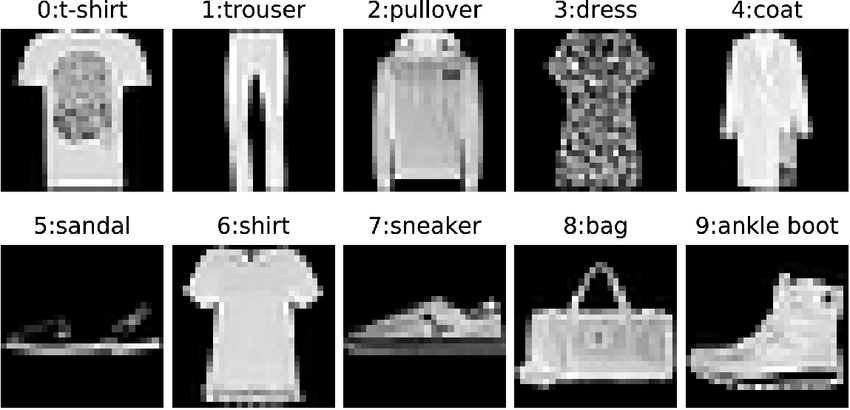

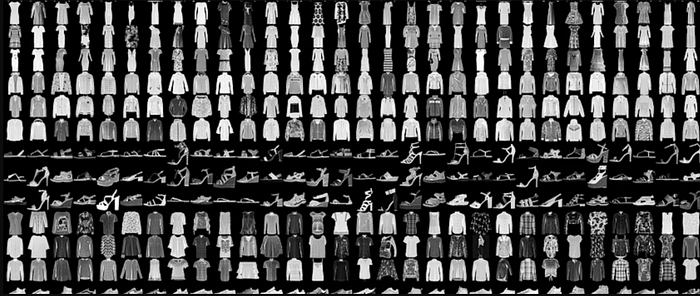

In [20]:
display(Image(filename='C:\\Users\\thesk\\eclipse-workspace\\PyTorch-FashionMMNIST\\Examples-of-Fashion-MNIST-dataset.png', width=400))
display(Image(filename='C:\\Users\\thesk\\eclipse-workspace\\PyTorch-FashionMMNIST\\Examples-of-Fashion-MNIST-dataset2.png'))

Epoch 1/5, Loss: 0.26724666357040405
Epoch 2/5, Loss: 0.4190421402454376
Epoch 3/5, Loss: 0.3087161183357239
Epoch 4/5, Loss: 0.8573554158210754
Epoch 5/5, Loss: 0.47410663962364197
Accuracy: 86.3%


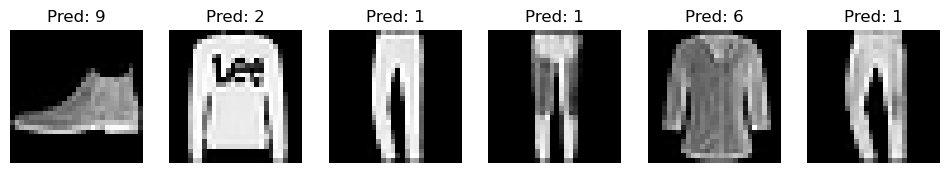

In [30]:
# Convert numpy arrays to PyTorch tensors
# PyTorch Tensors: These are multi-dimensional arrays provided by the PyTorch library, similar to NumPy arrays but optimized for deep learning tasks. 
# unsqueeze(1): Adds an extra dimension to the tensor as PyTorch expects image data to have a shape of [batch_size, channels, height, width]. For grayscale images channels is 1.
# If X_train originally has a shape of [60000, 28, 28] (60000 images, each 28x28 pixels), after unsqueeze(1), it will have a shape of [60000, 1, 28, 28].

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create DataLoader
# TensorDataset: This utility from PyTorch wraps PyTorch tensors into a dataset, so they can be accessed like a regular dataset object.
# PyTorch tensors containing the training and testing data and labels:
# X_train_tensor and X_test_tensor contain the features (e.g., images, numerical data, etc.).
# y_train_tensor and y_test_tensor contain the labels (e.g., the class or target values for each sample).

transform = transforms.Compose([transforms.ToTensor()])

# Load FashionMNIST dataset
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

# Define a simple neural network by
# defining a new class SimpleNN that inherits from nn.Module, which is the base class for all neural network modules in PyTorch.

class SimpleNN(nn.Module):
    def __init__(self):                   # The constructor method that initializes the neural network.
        super(SimpleNN, self).__init__()  # This calls the constructor of the parent class (nn.Module)
        self.fc1 = nn.Linear(28*28, 128)  # Define the 1st fully connected layer that takes an input of size 28*28 (784) and outputs 128 features.
        self.fc2 = nn.Linear(128, 64)     # Define the 2nd fully connected layer that takes 128 features and outputs 64 features
        self.fc3 = nn.Linear(64, 10)      # Define the 3rd fully connected layer that takes 64 features and outputs 10 features (one for each class).

    def forward(self, x):                 # forward method: This defines the forward pass of the neural network.
        x = x.view(-1, 28*28)             # This reshapes the input tensor x to have a shape of [batch_size, 28*28]. The -1 means the batch size is inferred automatically.
        x = torch.relu(self.fc1(x))       # This applies the 1st fully connected layer followed by the ReLU activation function.
        x = torch.relu(self.fc2(x))       # This applies the 2nd fully connected layer followed by the ReLU activation function.
        x = self.fc3(x)                   # This applies the 3rd fully connected layer.
        return x                          # This returns the output of the network.
    
# Initialize the model, loss function, and optimizer
model = SimpleNN()                  # Create an instance of the SimpleNN class, which is our neural network model.
criterion = nn.CrossEntropyLoss()   # criterion: This sets up the loss function, which measures how well the model’s predictions match the actual labels. nn.CrossEntropyLoss is commonly used for classification tasks.
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Set up the optimizer, which updates the model’s parameters to minimize the loss. Adam is a popular optimization algorithm. lr=0.001: This sets the learning rate, which controls how much the optimizer adjusts the parameters during each step.

# Train the model

# Train the model
epochs = 5  # Set the number of epochs to 5
for epoch in range(epochs):              # Loop over each epoch
    for images, labels in train_loader:  # Loop over each batch of data
        optimizer.zero_grad()            # Zero the gradients or clear old gradients from the previous step
        output = model(images)           # Forward pass: get predictions from the model
        loss = criterion(output, labels) # Calculate the loss / measure prediction error = the difference between the model’s predictions and the actual labels using the loss function.
        loss.backward()                  # Compute the gradients of the loss with respect to the model’s parameters. Gradients tell us how much each parameter (weight) in the model needs to change to reduce the loss. It uses backpropagation, a key algorithm in training neural networks, to calculate these gradients.
        optimizer.step()                 # Update the model's parameters
    print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")  # Print the loss for the current epoch to monitor training progress

        
# Evaluate the model
correct = 0  # Initialize the count of correct predictions
total = 0  # Initialize the total number of samples
# Correct and total are set to 0. These will keep track of the number of correct predictions and the total number of samples, respectively

with torch.no_grad():  # Disable gradient calculation for inference to reduce memory usage and speed up computations during inference
    for images, labels in test_loader:       # Iterate over batches of images&labels in test data
        output = model(images)               # Pass the images through the model to get the model output predictions.
        _, predicted = torch.max(output, 1)  # Get the index of the max log-probability.  Finds the predicted labels by taking the index of the maximum value in the output tensor along dimension 1.
        total += labels.size(0)              # Total is incremented by the number of labels in the current batch
        correct += (predicted == labels).sum().item()  # Correct is incremented by the number of correct predictions.

print(f"Accuracy: {100 * correct / total}%")  # Print the accuracy as a percentage


# Visualize some predictions on a bunch of test data
dataiter = iter(test_loader)     # Create an iterator from the test data loader to loop through the test data
images, labels = next(dataiter)  # Get the next batch of images and labels
output = model(images)           # Get model predictions for the batch
_, preds = torch.max(output, 1)  # Get the index of the max log-probability (predicted labels)


fig, axes = plt.subplots(1, 6, figsize=(12, 2))  # Create a figure with 1 row and 6 columns of subplots, and set the figure size
for i in range(6):                               # Loop through the first 6 images
    ax = axes[i]                                 # Get the current axis
    ax.imshow(images[i].numpy().squeeze(), cmap='gray')  # Display the image in grayscale
    ax.set_title(f"Pred: {preds[i].item()}")             # Set the title of the subplot to the predicted label
    ax.axis('off')                                       # Turn off the axis
plt.show()

The simpler, digits dataset had a 96% accuracy, the fashion dataset has a 86% accuracy.

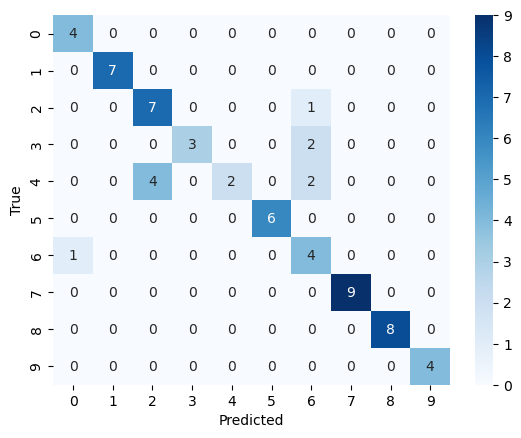

In [31]:
# Assuming preds and labels are your predictions and true labels
cm = confusion_matrix(labels, preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

The confusion matrix is a tool to evaluate the performance of a classification model.  
   
Axes: The rows represent the actual classes (true labels), and the columns represent the predicted classes.   
Diagonal Cells: The diagonal cells (from top left to bottom right) show the number of correct predictions for each class. Darker cells indicate higher counts.   
Off-Diagonal Cells: These cells show misclassifications, where the model predicted the wrong class. For example, an actual class ‘6’ was predicted as ‘0’ and appeared in the corresponding cell. Those classes are T-shirts and shirts which often may look the same even to humans.   
Interpretation: The matrix helps identify which classes are being confused by the model, allowing to understand and improve its performance.